In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# Konfigurasi dataset
DATA_PATH = 'dataset_hand_pose_V2'
gestures = ["Start_End", "Maju", "Mundur", "Kanan", "Kiri", "Atas", "Bawah", "Putar_kanan", "Putar_kiri", "Undefined"]
num_sequences = 74  # Jumlah sequences per gesture
sequence_length = 1  # Jumlah frame per sequence (hanya 1 frame digunakan)

In [3]:
# Fungsi untuk memuat data dan label
def load_data(data_path, gestures, num_sequences, sequence_length):
    X = []  # Data fitur (landmark tangan)
    y = []  # Label gesture

    for gesture_index, gesture in enumerate(gestures):
        gesture_path = os.path.join(data_path, gesture)
        if not os.path.exists(gesture_path):
            print(f"Warning: Gesture folder not found: {gesture_path}")
            continue

        for seq in range(num_sequences):
            sequence_path = os.path.join(gesture_path, f'sequence_{seq}')
            if not os.path.exists(sequence_path):
                print(f"Warning: Sequence folder not found: {sequence_path}")
                continue

            for frame in range(sequence_length):
                npy_file = os.path.join(sequence_path, f'frame_{frame}.npy')
                if os.path.exists(npy_file):
                    landmarks = np.load(npy_file)
                    X.append(landmarks)
                    y.append(gesture_index)  # Gunakan indeks gesture sebagai label
                else:
                    print(f"Warning: File not found: {npy_file}")

    if len(X) == 0 or len(y) == 0:
        raise ValueError("Dataset is empty or invalid. Please check the dataset structure and files.")

    return np.array(X), np.array(y)

In [4]:
# Memuat dataset
print("Loading dataset...")
X, y = load_data(DATA_PATH, gestures, num_sequences, sequence_length)
print(f"Dataset loaded: {X.shape[0]} samples with {X.shape[1]} features.")

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Loading dataset...
Dataset loaded: 740 samples with 63 features.


In [5]:
# Melatih model MLP
print("Training MLP model...")
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=800, random_state=42, verbose=True)
mlp.fit(X_train, y_train)


Training MLP model...
Iteration 1, loss = 2.31701719
Iteration 2, loss = 2.28553268
Iteration 3, loss = 2.26696802
Iteration 4, loss = 2.25033720
Iteration 5, loss = 2.23681373
Iteration 6, loss = 2.22252374
Iteration 7, loss = 2.20701302
Iteration 8, loss = 2.19054440
Iteration 9, loss = 2.17329566
Iteration 10, loss = 2.15471635
Iteration 11, loss = 2.13390977
Iteration 12, loss = 2.11143326
Iteration 13, loss = 2.08901381
Iteration 14, loss = 2.06284828
Iteration 15, loss = 2.03510033
Iteration 16, loss = 2.00535435
Iteration 17, loss = 1.97430047
Iteration 18, loss = 1.94055332
Iteration 19, loss = 1.90542153
Iteration 20, loss = 1.86805372
Iteration 21, loss = 1.82975709
Iteration 22, loss = 1.78924343
Iteration 23, loss = 1.74862353
Iteration 24, loss = 1.70681206
Iteration 25, loss = 1.66461306
Iteration 26, loss = 1.62349730
Iteration 27, loss = 1.58075130
Iteration 28, loss = 1.53922547
Iteration 29, loss = 1.49859444
Iteration 30, loss = 1.45858136
Iteration 31, loss = 1.4197

MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=800, random_state=42,
              verbose=True)

Evaluating model...
Accuracy: 97.97%

Classification Report (Per-Class Metrics):
             precision    recall  f1-score
Start_End     1.000000  1.000000  1.000000
Maju          1.000000  1.000000  1.000000
Mundur        0.888889  1.000000  0.941176
Kanan         0.937500  1.000000  0.967742
Kiri          1.000000  1.000000  1.000000
Atas          1.000000  1.000000  1.000000
Bawah         1.000000  1.000000  1.000000
Putar_kanan   1.000000  1.000000  1.000000
Putar_kiri    1.000000  1.000000  1.000000
Undefined     1.000000  0.823529  0.903226


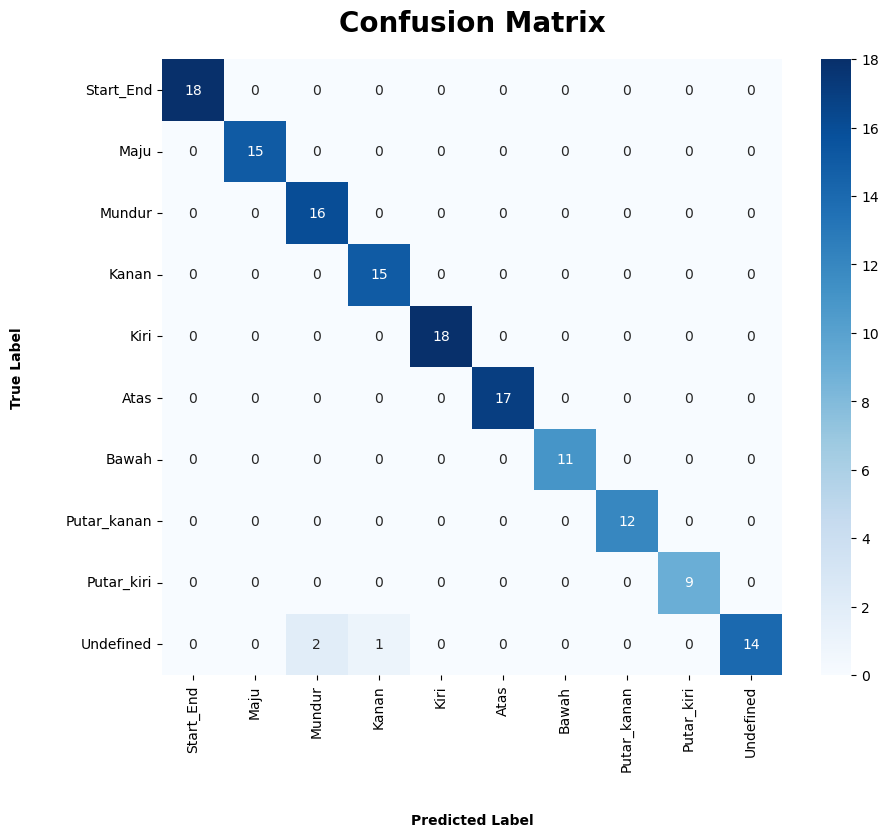

In [6]:
# Evaluasi model
print("Evaluating model...")
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Generate classification report
report = classification_report(y_test, y_pred, target_names=gestures, output_dict=True)

# Convert classification report to DataFrame and display as table
report_df = pd.DataFrame(report).transpose()
report_df = report_df.loc[gestures]  # Filter only gesture rows
print("\nClassification Report (Per-Class Metrics):")
print(report_df[['precision', 'recall', 'f1-score']])

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=gestures, yticklabels=gestures)
plt.title('Confusion Matrix', pad=20, weight='bold', fontsize=20)
plt.xlabel('Predicted Label', labelpad=30, weight='bold')
plt.ylabel('True Label', labelpad=30, weight='bold')
plt.show()

In [7]:
# Save model
model_path = "model/mlp_hand_pose_model_V3_75.pkl"
import joblib
joblib.dump(mlp, model_path)
print(f"Model saved to {model_path}")

Model saved to model/mlp_hand_pose_model_V3_75.pkl
